<a href="https://colab.research.google.com/github/harinilakshman/linear_regression_model/blob/main/Linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
a=pd.read_csv("/content/car_purchasing.csv",encoding="latin1")

In [14]:
df=a.copy()
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [15]:
a.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


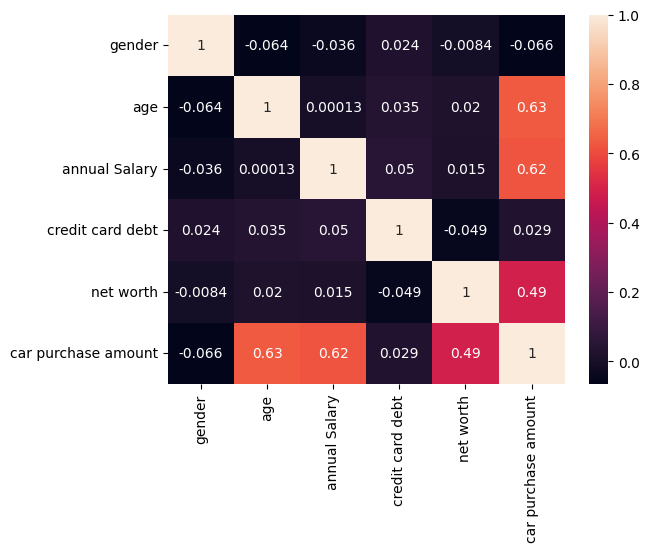

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
df1=a.copy()
sns.heatmap(df1.corr(numeric_only=True),annot=True)
plt.show()

In [18]:
df.drop(['customer name','customer e-mail','country','gender '],axis=1,inplace=True, errors='ignore' )

In [19]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [22]:
import numpy as np
y=y.values.reshape(-1,1)

feature scaling min max scaling

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y)
#print(x)
#print(y)

split the data for training-80%, testing-20% x-features, y-labels

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,shuffle=True,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(450, 5)
(50, 5)
(450, 1)
(50, 1)


In 500 samples total in input 400 has been trained and 100 is in testing with all 5 features.
In 500 samples total in output 400 has been trained and 100 is in testing with 1 feature.

In [25]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
lr_pred=lr.predict(x_test)
print(lr_pred)

[[0.52231756]
 [0.50789362]
 [0.761713  ]
 [0.32166671]
 [0.72480214]
 [0.76250902]
 [0.61239413]
 [0.64447567]
 [0.61559233]
 [0.54745617]
 [0.41109488]
 [0.6652055 ]
 [0.49804683]
 [0.42257705]
 [0.43630616]
 [0.6503319 ]
 [0.56198841]
 [0.12090771]
 [0.72575212]
 [0.57734583]
 [0.45566051]
 [0.61670373]
 [0.60186014]
 [0.40905495]
 [0.45570444]
 [0.41185256]
 [0.77671377]
 [0.54913488]
 [0.19270501]
 [0.60905786]
 [0.65025366]
 [0.51914727]
 [0.45279907]
 [0.68212142]
 [0.47783347]
 [0.4350992 ]
 [0.74270333]
 [0.30761166]
 [0.46775302]
 [0.43796654]
 [0.68031349]
 [0.72775158]
 [0.54145408]
 [0.38927399]
 [0.62660954]
 [0.49906769]
 [0.37071565]
 [0.46886893]
 [0.60643496]
 [0.53861476]]


In [26]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,lr_pred)
print(r2)

0.999999980060625


In [27]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,lr_pred)
print(mse)

4.050194566516783e-10


In [28]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,lr_pred)
print(mae)

1.5683566058362075e-05


In [29]:
#RMSE: 2.09 × 10⁻⁵
from sklearn.metrics import root_mean_squared_error
rmse=root_mean_squared_error(y_test,lr_pred)
print(rmse)

2.012509519608984e-05


In [30]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)
ridge_pred=ridge.predict(x_test)
print(ridge_pred)

[0.52014098 0.50577245 0.74104546 0.33331437 0.70971076 0.74331238
 0.60624281 0.63371274 0.60802784 0.54108453 0.41846281 0.65294321
 0.49823738 0.42639565 0.44100379 0.63683601 0.55636517 0.15123405
 0.70894197 0.56811763 0.45716184 0.60370812 0.59499304 0.41636409
 0.45954579 0.41876546 0.75492154 0.54364452 0.21622842 0.6006326
 0.63695306 0.51455838 0.45818732 0.6631268  0.4806018  0.43929043
 0.72049237 0.32178725 0.46967118 0.44338262 0.66554519 0.7096568
 0.53983336 0.39518945 0.61657293 0.49781104 0.38002558 0.46990939
 0.59393183 0.53404724]


In [31]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,ridge_pred)
print(r2)

0.993191566131808


In [32]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,ridge_pred)
print(mse)

0.00013829662079988754


In [33]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
lasso.score(x_train,y_train)
lasso_pred=lasso.predict(x_test)
print(lasso_pred)

[0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787 0.4914787
 0.4914787]


In [34]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,lasso_pred)
print(r2)

-0.0967877807853319


In [35]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,lasso_pred)
print(mse)

0.022278551389895256


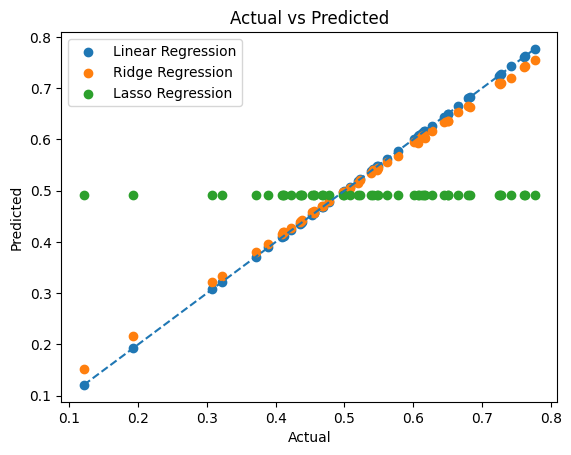

In [36]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(y_test,lr_pred,label="Linear Regression")
plt.scatter(y_test,ridge_pred,label="Ridge Regression")
plt.scatter(y_test,lasso_pred,label="Lasso Regression")
plt.plot([y_test.min(),y_test.max()],
         [y_test.min(),y_test.max()],
         linestyle='--')
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.legend()
plt.show()